# Homework 2: Movies.

The file comes from IMDB websites and contains rating for movies on the platform. It also contains the budgets and the income of every movie.
To simplify thinkgs, if you need to work on genres, admit that the main genre is the column named `genre_0`

As movies may be from totally different epochs and years, the budgets are not comparable. That's why I rescaled the budget depending on the year of the movie using the inflation (basically how much does 1$ in 1920 is worth in 2020 for instance). The rescaled budgets are named `inflated_budget` and `inflated_worldwide_income` please use these columns if you want to do comparisons

## Try to answer to each question with a plot, the one you find that fits the most to the question.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt
pd.options.display.max_columns = 200

In [2]:
movies = pd.read_csv("./movies_db.csv")

In [2]:
movies.head()

NameError: name 'movies' is not defined

In [4]:
movies.columns

Index(['original_title', 'year', 'genre', 'duration', 'country', 'language',
       'director', 'production_company', 'actors', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'year_published',
       'number_genres', 'genre_0', 'genre_1', 'genre_2', 'inflated_budget',
       'inflated_worldwide_income', 'main_actor', 'main_director',
       'genre_list'],
      dtype='object')

In [5]:
movies.shape

(10760, 24)

In [6]:
movies.dtypes

original_title                object
year                           int64
genre                         object
duration                       int64
country                       object
language                      object
director                      object
production_company            object
actors                        object
avg_vote                     float64
votes                          int64
budget                       float64
usa_gross_income             float64
worlwide_gross_income        float64
year_published                 int64
number_genres                  int64
genre_0                       object
genre_1                       object
genre_2                       object
inflated_budget              float64
inflated_worldwide_income    float64
main_actor                    object
main_director                 object
genre_list                    object
dtype: object

In [11]:
movies.head(3)

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list
0,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",8.1,55601,18000.0,8811.0,8811.0,1920,3,Fantasy,Horror,Mystery,2.259963e+05,1.106252e+05,Werner Krauss,Robert Wiene,"['Fantasy', 'Horror', 'Mystery']"
1,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Silent,Rex Ingram,Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000.0,9183673.0,9183673.0,1923,3,Drama,Romance,War,1.122266e+07,1.288315e+08,Pomeroy Cannon,Rex Ingram,"['Drama', 'Romance', 'War']"
2,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",8.3,109038,250000.0,NaN,26916.0,1923,3,Comedy,Drama,Family,3.507081e+06,3.775864e+05,Carl Miller,Charles Chaplin,"['Comedy', 'Drama', 'Family']"


## 1.Let's do some box plots

### What genres make a movie to have high ratings?

In [8]:
high_ratings = movies.sort_values(by=["avg_vote", "genre_0"],ascending=False)
high_ratings.head(5)

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list
1973,The Shawshank Redemption,1994,Drama,142,USA,English,Frank Darabont,Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,2278845,25000000.0,28699976.0,2.881524e+07,1995,1,Drama,NaN,NaN,4.235948e+07,4.882395e+07,Tim Robbins,Frank Darabont,['Drama']
10271,The Transcendents,2018,"Music, Mystery, Thriller",96,USA,English,Derek Ahonen,NaN,"Rob Franco, Savannah Welch, Kathy Valentine, W...",9.2,1450,90000.0,1090.0,1.090000e+03,2020,3,Music,Mystery,Thriller,9.000000e+04,1.090000e+03,Rob Franco,Derek Ahonen,"['Music', 'Mystery', 'Thriller']"
280,The Godfather,1972,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,Paramount Pictures,"Marlon Brando, Al Pacino, James Caan, Richard ...",9.2,1572674,6000000.0,134966411.0,2.461210e+08,1972,2,Crime,Drama,NaN,3.604407e+07,1.478533e+09,Marlon Brando,Francis Ford Coppola,"['Crime', 'Drama']"
312,The Godfather: Part II,1974,"Crime, Drama",202,USA,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,Paramount Pictures,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",9.0,1098714,13000000.0,47834595.0,4.803578e+07,1975,2,Crime,Drama,NaN,6.621483e+07,2.446678e+08,Al Pacino,Francis Ford Coppola,"['Crime', 'Drama']"
5156,The Dark Knight,2008,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,Warner Bros.,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,2241615,185000000.0,535234033.0,1.005455e+09,2008,3,Action,Crime,Drama,2.157647e+08,1.172658e+09,Christian Bale,Christopher Nolan,"['Action', 'Crime', 'Drama']"


[]

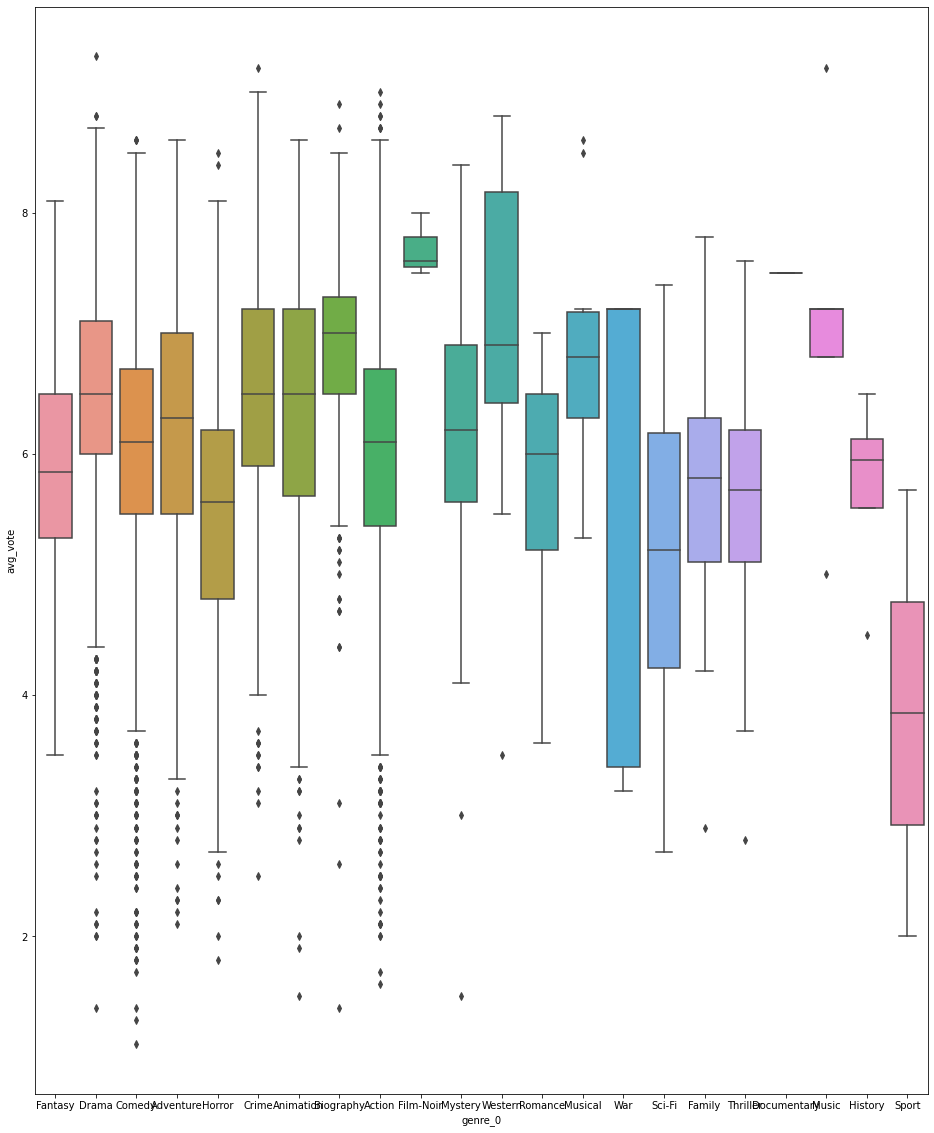

In [12]:
plt.figure(figsize=(16,20))
sns.boxplot(movies["genre_0"], movies["avg_vote"])
plt.plot() 

In [11]:
Plus = movies.loc[movies["avg_vote"] >= 8,:]
Plus

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list
0,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",8.1,55601,18000.0,8811.0,8811.0,1920,3,Fantasy,Horror,Mystery,2.259963e+05,1.106252e+05,Werner Krauss,Robert Wiene,"['Fantasy', 'Horror', 'Mystery']"
2,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",8.3,109038,250000.0,NaN,26916.0,1923,3,Comedy,Drama,Family,3.507081e+06,3.775864e+05,Carl Miller,Charles Chaplin,"['Comedy', 'Drama', 'Family']"
4,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",8.2,97480,923000.0,NaN,26916.0,1925,3,Adventure,Comedy,Drama,1.324410e+07,3.862169e+05,Charles Chaplin,Charles Chaplin,"['Adventure', 'Comedy', 'Drama']"
5,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,English,F.W. Murnau,Fox Film Corporation,"George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000.0,NaN,121107.0,1928,2,Drama,Romance,NaN,2.886287e+06,1.747748e+06,George O'Brien,F.W. Murnau,"['Drama', 'Romance']"
7,The Circus,1928,"Comedy, Romance",72,USA,English,Charles Chaplin,Charles Chaplin Productions,"Al Ernest Garcia, Merna Kennedy, Harry Crocker...",8.1,27414,900000.0,NaN,26916.0,1928,2,Comedy,Romance,NaN,1.321616e+07,3.952512e+05,Al Ernest Garcia,Charles Chaplin,"['Comedy', 'Romance']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,Andhadhun,2018,"Crime, Thriller",139,India,"Hindi, English",Sriram Raghavan,Matchbox Pictures,"Ayushmann Khurrana, Tabu, Radhika Apte, Anil D...",8.3,65800,4500000.0,1193046.0,62475342.0,2018,2,Crime,Thriller,NaN,4.500000e+06,6.247534e+07,Ayushmann Khurrana,Sriram Raghavan,"['Crime', 'Thriller']"
10664,Capharnaüm,2018,Drama,126,"Lebanon, USA, France, Cyprus, Qatar, UK","Arabic, Amharic",Nadine Labaki,Mooz Films,"Zain Al Rafeea, Yordanos Shiferaw, Boluwatife ...",8.4,53506,4000000.0,1661096.0,64417003.0,2019,1,Drama,NaN,NaN,4.000000e+06,6.441700e+07,Zain Al Rafeea,Nadine Labaki,['Drama']
10685,1917,2019,"Drama, War",119,"USA, UK, India, Spain, Canada, China","English, French, German",Sam Mendes,DreamWorks,"Dean-Charles Chapman, George MacKay, Daniel Ma...",8.3,362897,95000000.0,159227644.0,384857224.0,2020,2,Drama,War,NaN,9.500000e+07,3.848572e+08,Dean-Charles Chapman,Sam Mendes,"['Drama', 'War']"
10691,Qismat,2018,"Drama, Romance",137,India,Punjabi,Jagdeep Sidhu,NaN,"Ammy Virk, Sargun Mehta, Guggu Gill, Tania, Ma...",8.4,2086,1000000.0,NaN,188044.0,2018,2,Drama,Romance,NaN,1.000000e+06,1.880440e+05,Ammy Virk,Jagdeep Sidhu,"['Drama', 'Romance']"


In [12]:
Plus.sort_values(by=["avg_vote", "genre_0"],ascending=False)

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list
1973,The Shawshank Redemption,1994,Drama,142,USA,English,Frank Darabont,Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,2278845,25000000.0,28699976.0,2.881524e+07,1995,1,Drama,NaN,NaN,4.235948e+07,4.882395e+07,Tim Robbins,Frank Darabont,['Drama']
10271,The Transcendents,2018,"Music, Mystery, Thriller",96,USA,English,Derek Ahonen,NaN,"Rob Franco, Savannah Welch, Kathy Valentine, W...",9.2,1450,90000.0,1090.0,1.090000e+03,2020,3,Music,Mystery,Thriller,9.000000e+04,1.090000e+03,Rob Franco,Derek Ahonen,"['Music', 'Mystery', 'Thriller']"
280,The Godfather,1972,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,Paramount Pictures,"Marlon Brando, Al Pacino, James Caan, Richard ...",9.2,1572674,6000000.0,134966411.0,2.461210e+08,1972,2,Crime,Drama,NaN,3.604407e+07,1.478533e+09,Marlon Brando,Francis Ford Coppola,"['Crime', 'Drama']"
312,The Godfather: Part II,1974,"Crime, Drama",202,USA,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,Paramount Pictures,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",9.0,1098714,13000000.0,47834595.0,4.803578e+07,1975,2,Crime,Drama,NaN,6.621483e+07,2.446678e+08,Al Pacino,Francis Ford Coppola,"['Crime', 'Drama']"
5156,The Dark Knight,2008,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,Warner Bros.,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,2241615,185000000.0,535234033.0,1.005455e+09,2008,3,Action,Crime,Drama,2.157647e+08,1.172658e+09,Christian Bale,Christopher Nolan,"['Action', 'Crime', 'Drama']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,The Revenant,2015,"Action, Adventure, Drama",156,"USA, Hong Kong, Taiwan","English, Pawnee, French",Alejandro G. Iñárritu,Regency Enterprises,"Leonardo DiCaprio, Tom Hardy, Domhnall Gleeson...",8.0,684961,135000000.0,183637894.0,5.329505e+08,2016,3,Action,Adventure,Drama,1.430254e+08,5.646329e+08,Leonardo DiCaprio,Alejandro G. Iñárritu,"['Action', 'Adventure', 'Drama']"
8104,Blade Runner 2049,2017,"Action, Drama, Mystery",164,"USA, UK, Hungary, Canada, Spain","English, Finnish, Japanese, Hungarian, Russian...",Denis Villeneuve,Alcon Entertainment,"Ryan Gosling, Dave Bautista, Robin Wright, Mar...",8.0,440890,150000000.0,92054159.0,2.592397e+08,2017,3,Action,Drama,Mystery,1.536637e+08,2.655715e+08,Ryan Gosling,Denis Villeneuve,"['Action', 'Drama', 'Mystery']"
8133,X-Men: Days of Future Past,2014,"Action, Adventure, Sci-Fi",132,"USA, UK, Canada","English, Vietnamese, French",Bryan Singer,Twentieth Century Fox,"Hugh Jackman, James McAvoy, Michael Fassbender...",8.0,650414,200000000.0,233921534.0,7.460457e+08,2014,3,Action,Adventure,Sci-Fi,2.121410e+08,7.913342e+08,Hugh Jackman,Bryan Singer,"['Action', 'Adventure', 'Sci-Fi']"
8311,Guardians of the Galaxy,2014,"Action, Adventure, Comedy",121,USA,English,James Gunn,Marvel Studios,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",8.0,1023350,170000000.0,333176600.0,7.727912e+08,2014,3,Action,Adventure,Comedy,1.803198e+08,8.197033e+08,Chris Pratt,James Gunn,"['Action', 'Adventure', 'Comedy']"


In [13]:
Plus["genre_0"].value_counts()

Drama        98
Action       52
Crime        38
Biography    38
Comedy       32
Adventure    28
Animation    25
Mystery       5
Horror        4
Western       3
Musical       2
Music         1
Film-Noir     1
Fantasy       1
Name: genre_0, dtype: int64

In [ ]:
#Drama 98, Action 52, Crime 38, Biography 38, Comedy 32, Adventure 28, Animation 25

### What genres have the highest budgets

In [14]:
movies.groupby("genre_0").apply(lambda df: df.loc[df.inflated_budget.idxmax()])

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list
genre_0,,,,,,,,,,,,,,,,,,,,,,,,
Action,Pirates of the Caribbean: At World's End,2007,"Action, Adventure, Fantasy",169,USA,English,Gore Verbinski,Walt Disney Pictures,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",7.1,585229,300000000.0,309420425.0,9.609965e+08,2007,3,Action,Adventure,Fantasy,3.633229e+08,1.163840e+09,Johnny Depp,Gore Verbinski,"['Action', 'Adventure', 'Fantasy']"
Adventure,The Hobbit: The Battle of the Five Armies,2014,"Adventure, Fantasy",144,"New Zealand, USA",English,Peter Jackson,New Line Cinema,"Ian McKellen, Martin Freeman, Richard Armitage...",7.4,464157,250000000.0,255119788.0,9.560198e+08,2014,2,Adventure,Fantasy,NaN,2.651762e+08,1.014055e+09,Ian McKellen,Peter Jackson,"['Adventure', 'Fantasy']"
Animation,Tangled,2010,"Animation, Adventure, Comedy",100,USA,English,"Nathan Greno, Byron Howard",Walt Disney Animation Studios,"Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",7.7,396086,260000000.0,200821936.0,5.924617e+08,2010,3,Animation,Adventure,Comedy,2.994085e+08,6.822618e+08,Mandy Moore,Nathan Greno,"['Animation', 'Adventure', 'Comedy']"
Biography,Cleopatra,1963,"Biography, Drama, History",192,"Switzerland, UK, USA",English,Joseph L. Mankiewicz,Twentieth Century Fox,"Elizabeth Taylor, Richard Burton, Rex Harrison...",7.0,28653,44000000.0,57777778.0,5.777778e+07,1964,3,Biography,Drama,History,3.610689e+08,4.741309e+08,Elizabeth Taylor,Joseph L. Mankiewicz,"['Biography', 'Drama', 'History']"
Comedy,Evan Almighty,2007,"Comedy, Family, Fantasy",96,USA,English,Tom Shadyac,Universal Pictures,"Steve Carell, Morgan Freeman, Lauren Graham, J...",5.4,137414,175000000.0,100462298.0,1.744407e+08,2007,3,Comedy,Family,Fantasy,2.119384e+08,2.112610e+08,Steve Carell,Tom Shadyac,"['Comedy', 'Family', 'Fantasy']"
Crime,Ocean's Twelve,2004,"Crime, Thriller",125,USA,"English, Dutch, French, Italian, Mandarin",Steven Soderbergh,Warner Bros.,"Brad Pitt, Catherine Zeta-Jones, George Cloone...",6.5,351814,110000000.0,125544280.0,3.627443e+08,2004,2,Crime,Thriller,NaN,1.462243e+08,4.822003e+08,Brad Pitt,Steven Soderbergh,"['Crime', 'Thriller']"
Documentary,This Is Elvis,1981,"Documentary, Biography, Music",101,USA,English,"Malcolm Leo, Andrew Solt",Warner Bros.,"David Scott, Paul Boensch III, Johnny Harra, L...",7.5,1119,5000000.0,2028612.0,2.028612e+06,1981,3,Documentary,Biography,Music,1.381227e+07,5.603946e+06,David Scott,Malcolm Leo,"['Documentary', 'Biography', 'Music']"
Drama,Titanic,1997,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",7.8,1023181,200000000.0,659363944.0,2.195170e+09,1998,2,Drama,Romance,NaN,3.129059e+08,3.434408e+09,Leonardo DiCaprio,James Cameron,"['Drama', 'Romance']"
Family,Beauty and the Beast,2017,"Family, Fantasy, Musical",129,USA,English,Bill Condon,Mandeville Films,"Emma Watson, Dan Stevens, Luke Evans, Josh Gad...",7.1,263977,160000000.0,504481165.0,1.264064e+09,2017,3,Family,Fantasy,Musical,1.639080e+08,1.294939e+09,Emma Watson,Bill Condon,"['Family', 'Fantasy', 'Musical']"


In [15]:
movies.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,inflated_budget,inflated_worldwide_income
count,10760.000000,10760.000000,10760.000000,1.076000e+04,1.076000e+04,7.562000e+03,1.076000e+04,10760.000000,10760.000000,1.076000e+04,1.076000e+04
mean,2003.940613,105.542751,6.181227,6.130108e+04,2.152405e+07,3.660616e+07,5.619014e+07,2004.362082,2.398141,2.902047e+07,7.842709e+07
std,12.806840,18.323244,1.086218,1.379812e+05,3.371589e+07,6.373808e+07,1.427012e+08,12.696158,0.750026,4.096067e+07,2.014706e+08
min,1920.000000,60.000000,1.100000,1.000000e+02,1.000000e+03,7.400000e+01,1.000000e+03,1920.000000,1.000000,1.211076e+03,1.047000e+03
25%,1999.000000,93.000000,5.600000,1.746250e+03,2.750000e+06,1.188474e+06,5.984965e+05,1999.000000,2.000000,3.633229e+06,7.754202e+05
50%,2007.000000,102.000000,6.300000,1.209900e+04,9.256506e+06,1.400000e+07,7.458098e+06,2007.000000,3.000000,1.350000e+07,1.059306e+07
75%,2013.000000,115.000000,6.900000,5.763150e+04,2.500000e+07,4.435774e+07,4.455266e+07,2013.000000,3.000000,3.649306e+07,6.630101e+07
max,2020.000000,272.000000,9.300000,2.278845e+06,3.560000e+08,9.366622e+08,2.797801e+09,2020.000000,3.000000,3.633229e+08,7.268601e+09


In [16]:
highest_budgets = movies.loc[movies["inflated_budget"] >= 3.649306e+07,:]
highest_budgets

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list
29,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,283975,3977000.0,200852579.0,402352579.0,1949,3,Drama,History,Romance,7.184551e+07,7.268601e+09,Thomas Mitchell,Victor Fleming,"['Drama', 'History', 'Romance']"
32,The Wizard of Oz,1939,"Adventure, Family, Fantasy",102,USA,English,"Victor Fleming, George Cukor",Metro-Goldwyn-Mayer (MGM),"Judy Garland, Frank Morgan, Ray Bolger, Bert L...",8.0,366293,2777000.0,24790250.0,26142032.0,1949,3,Adventure,Family,Fantasy,5.016720e+07,4.722624e+08,Judy Garland,Victor Fleming,"['Adventure', 'Family', 'Fantasy']"
34,Fantasia,1940,"Animation, Family, Fantasy",125,USA,English,"James Algar, Samuel Armstrong",Walt Disney Productions,"Deems Taylor, Leopold Stokowski, The Philadelp...",7.8,86795,2280000.0,76408097.0,76411401.0,1946,3,Animation,Family,Fantasy,4.089457e+07,1.370531e+09,Deems Taylor,James Algar,"['Animation', 'Family', 'Fantasy']"
37,Pinocchio,1940,"Animation, Comedy, Family",88,USA,English,"Norman Ferguson, T. Hee",Walt Disney Animation Studios,"Mel Blanc, Don Brodie, Stuart Buchanan, Walter...",7.4,127618,2600000.0,84254167.0,121892045.0,1947,3,Animation,Comedy,Family,4.663416e+07,2.186282e+09,Mel Blanc,Norman Ferguson,"['Animation', 'Comedy', 'Family']"
47,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,Konrad Pictures,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",6.4,77852,48000000.0,47121859.0,76019048.0,2002,3,Comedy,Fantasy,Romance,6.805836e+07,1.077861e+08,Meg Ryan,James Mangold,"['Comedy', 'Fantasy', 'Romance']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,Birds of Prey: And the Fantabulous Emancipatio...,2020,"Action, Adventure, Crime",109,USA,"English, Chinese",Cathy Yan,Clubhouse Pictures (II),"Margot Robbie, Rosie Perez, Mary Elizabeth Win...",6.1,137373,84500000.0,84158461.0,201858461.0,2020,3,Action,Adventure,Crime,8.450000e+07,2.018585e+08,Margot Robbie,Cathy Yan,"['Action', 'Adventure', 'Crime']"
10635,The Mule,2018,"Crime, Drama, Thriller",116,"USA, Canada","English, Spanish",Clint Eastwood,Warner Bros.,"Clint Eastwood, Patrick L. Reyes, Cesar De Leó...",7.0,101090,50000000.0,103804407.0,174804407.0,2019,3,Crime,Drama,Thriller,5.000000e+07,1.748044e+08,Clint Eastwood,Clint Eastwood,"['Crime', 'Drama', 'Thriller']"
10639,Jumanji: The Next Level,2019,"Action, Adventure, Comedy",123,USA,English,Jake Kasdan,Matt Tolmach Productions,"Dwayne Johnson, Kevin Hart, Jack Black, Karen ...",6.7,168698,125000000.0,316831246.0,796575993.0,2019,3,Action,Adventure,Comedy,1.250000e+08,7.965760e+08,Dwayne Johnson,Jake Kasdan,"['Action', 'Adventure', 'Comedy']"
10685,1917,2019,"Drama, War",119,"USA, UK, India, Spain, Canada, China","English, French, German",Sam Mendes,DreamWorks,"Dean-Charles Chapman, George MacKay, Daniel Ma...",8.3,362897,95000000.0,159227644.0,384857224.0,2020,2,Drama,War,NaN,9.500000e+07,3.848572e+08,Dean-Charles Chapman,Sam Mendes,"['Drama', 'War']"


In [17]:
highest_budgets["genre_0"].value_counts()

Action       1011
Comedy        548
Drama         310
Animation     248
Adventure     235
Crime         140
Biography     125
Horror         41
Mystery        11
Fantasy         8
Sci-Fi          4
Romance         2
Musical         1
Western         1
War             1
Family          1
Thriller        1
Name: genre_0, dtype: int64

[]

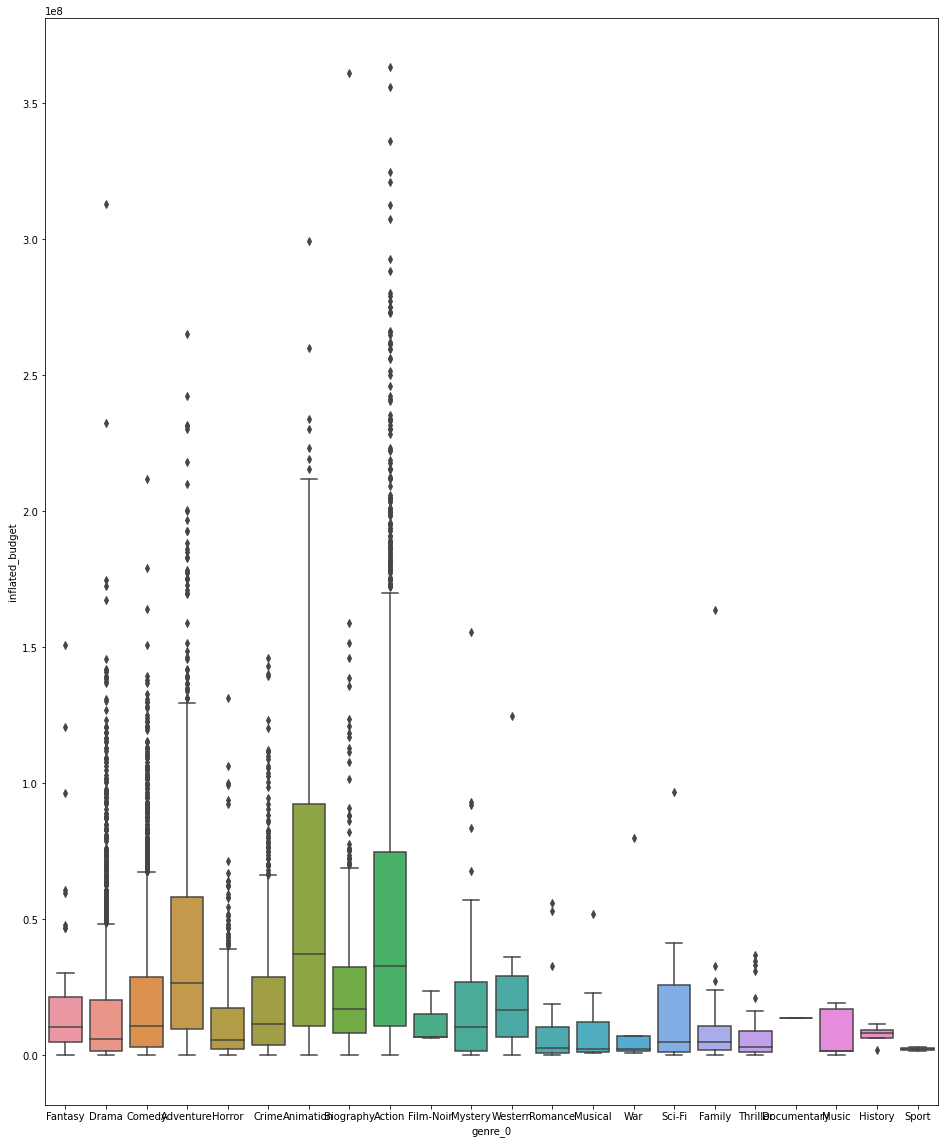

In [13]:
plt.figure(figsize=(16,20))
sns.boxplot(movies["genre_0"], movies["inflated_budget"])
plt.plot() 

### Action       1011, Comedy        548

## 2.Which genre are the most frequent?

In [14]:
movies["genre_0"].value_counts().values

array([2992, 2439, 2186,  764,  564,  550,  491,  488,   66,   61,   45,
         33,   23,   18,   10,   10,    5,    5,    4,    3,    2,    1],
      dtype=int64)

[]

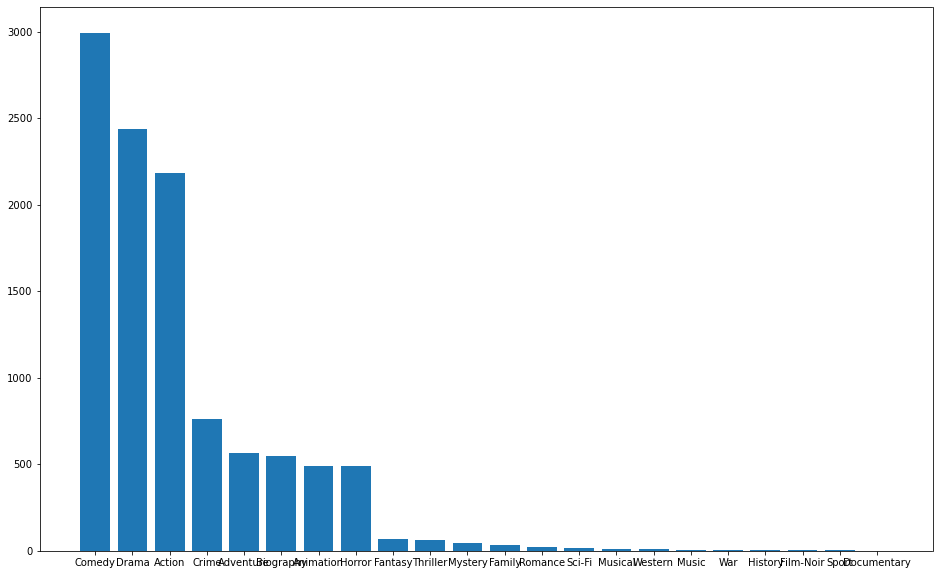

In [15]:
plt.figure(figsize=(16,10))
plt.bar(movies["genre_0"].value_counts().index, 
        movies["genre_0"].value_counts().values)
plt.plot() 

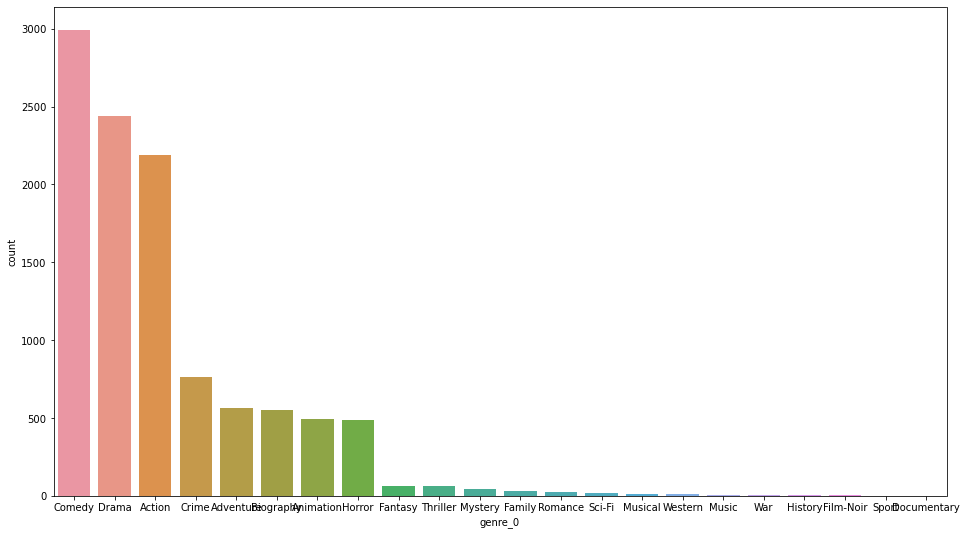

In [16]:
plt.figure(figsize=(16,9))
sns.countplot(x = movies["genre_0"], 
              order = movies["genre_0"].value_counts().index)
plt.show()

In [16]:
freq = movies["genre_0"].value_counts()
freq

Comedy         2992
Drama          2439
Action         2186
Crime           764
Adventure       564
Biography       550
Animation       491
Horror          488
Fantasy          66
Thriller         61
Mystery          45
Family           33
Romance          23
Sci-Fi           18
Musical          10
Western          10
War               5
Music             5
History           4
Film-Noir         3
Sport             2
Documentary       1
Name: genre_0, dtype: int64

In [17]:
freq.head(10)

Comedy       2992
Drama        2439
Action       2186
Crime         764
Adventure     564
Biography     550
Animation     491
Horror        488
Fantasy        66
Thriller       61
Name: genre_0, dtype: int64

### Comedy       2992, Drama        2439, Action       2186

## 3.Which movie generated the highest ROI and which one was a complete mess

In [ ]:
#"gross_margin" (income - budget)

In [17]:
movies["gross_margin"] = movies["inflated_worldwide_income"] - movies["inflated_budget"]
movies

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
0,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",8.1,55601,18000.0,8811.0,8811.0,1920,3,Fantasy,Horror,Mystery,2.259963e+05,1.106252e+05,Werner Krauss,Robert Wiene,"['Fantasy', 'Horror', 'Mystery']",-1.153711e+05
1,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Silent,Rex Ingram,Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000.0,9183673.0,9183673.0,1923,3,Drama,Romance,War,1.122266e+07,1.288315e+08,Pomeroy Cannon,Rex Ingram,"['Drama', 'Romance', 'War']",1.176089e+08
2,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",8.3,109038,250000.0,NaN,26916.0,1923,3,Comedy,Drama,Family,3.507081e+06,3.775864e+05,Carl Miller,Charles Chaplin,"['Comedy', 'Drama', 'Family']",-3.129495e+06
3,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000.0,NaN,11233.0,1927,2,Drama,Romance,NaN,5.154302e+06,1.649523e+05,Edna Purviance,Charles Chaplin,"['Drama', 'Romance']",-4.989349e+06
4,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",8.2,97480,923000.0,NaN,26916.0,1925,3,Adventure,Comedy,Drama,1.324410e+07,3.862169e+05,Charles Chaplin,Charles Chaplin,"['Adventure', 'Comedy', 'Drama']",-1.285788e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755,Dreissig,2019,Drama,115,Germany,German,Simona Kostova,Deutsche Film- und Fernsehakademie Berlin (DFFB),"Henner Borchers, Övünç Güvenisik, Pascal Houdu...",6.2,190,9000.0,NaN,30389.0,2020,1,Drama,NaN,NaN,9.000000e+03,3.038900e+04,Henner Borchers,Simona Kostova,['Drama'],2.138900e+04
10756,I Still Believe,2020,"Biography, Drama, Music",116,USA,English,"Andrew Erwin, Jon Erwin",Kevin Downes Productions,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",6.5,6196,12000000.0,9868521.0,13681524.0,2020,3,Biography,Drama,Music,1.200000e+07,1.368152e+07,K.J. Apa,Andrew Erwin,"['Biography', 'Drama', 'Music']",1.681524e+06
10757,Mestari Cheng,2019,"Comedy, Drama",114,"Finland, China","English, Finnish, Mandarin",Mika Kaurismäki,By Media,"Pak Hon Chu, Lucas Hsuan, Vesa-Matti Loiri, An...",6.8,251,2869000.0,NaN,435909.0,2019,2,Comedy,Drama,NaN,2.869000e+06,4.359090e+05,Pak Hon Chu,Mika Kaurismäki,"['Comedy', 'Drama']",-2.433091e+06
10758,Sang Krasue,2019,"Drama, Horror, Romance",122,Thailand,Thai,Sitisiri Mongkolsiri,Nakid,"Phantira Pipityakorn, Oabnithi Wiwattanawarang...",6.5,1206,1200000.0,NaN,171229.0,2019,3,Drama,Horror,Romance,1.200000e+06,1.712290e+05,Phantira Pipityakorn,Sitisiri Mongkolsiri,"['Drama', 'Horror', 'Romance']",-1.028771e+06


In [27]:
movies["gross_margin"].describe()

count    1.076000e+04
mean     4.940662e+07
std      1.788674e+08
min     -1.683109e+08
25%     -5.374896e+06
50%     -2.847994e+05
75%      3.245703e+07
max      7.196755e+09
Name: gross_margin, dtype: float64

In [28]:
movies["gross_margin"].max()

7196755145.032591

In [29]:
movies.query("gross_margin == 7196755145.032591")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
29,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,283975,3977000.0,200852579.0,402352579.0,1949,3,Drama,History,Romance,7.184551e+07,7.268601e+09,Thomas Mitchell,Victor Fleming,"['Drama', 'History', 'Romance']",7.196755e+09


In [30]:
movies["gross_margin"].min()

-168310925.74204358

In [31]:
movies.query("gross_margin == -168310925.74204358")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
227,"Hello, Dolly!",1969,"Adventure, Comedy, Musical",146,USA,English,Gene Kelly,Chenault Productions,"Barbra Streisand, Walter Matthau, Michael Craw...",7.1,13203,25000000.0,400881.0,400881.0,1969,3,Adventure,Comedy,Musical,1.710538e+08,2.742889e+06,Barbra Streisand,Gene Kelly,"['Adventure', 'Comedy', 'Musical']",-1.683109e+08


In [37]:
movies.sort_values(by=["gross_margin"], ascending=False).head(5)

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
29,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,283975,3977000.0,200852579.0,4.023526e+08,1949,3,Drama,History,Romance,7.184551e+07,7.268601e+09,Thomas Mitchell,Victor Fleming,"['Drama', 'History', 'Romance']",7.196755e+09
25,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,177157,1499000.0,184925486.0,1.849255e+08,1938,3,Animation,Family,Fantasy,2.613954e+07,3.224728e+09,Roy Atwell,William Cottrell,"['Animation', 'Family', 'Fantasy']",3.198589e+09
378,Star Wars,1977,"Action, Adventure, Fantasy",121,USA,English,George Lucas,Lucasfilm,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",8.6,1204107,11000000.0,460998507.0,7.757689e+08,1977,3,Action,Adventure,Fantasy,4.558048e+07,3.214538e+09,Mark Hamill,George Lucas,"['Action', 'Adventure', 'Fantasy']",3.168958e+09
2499,Titanic,1997,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",7.8,1023181,200000000.0,659363944.0,2.195170e+09,1998,2,Drama,Romance,NaN,3.129059e+08,3.434408e+09,Leonardo DiCaprio,James Cameron,"['Drama', 'Romance']",3.121502e+09
5414,Avatar,2009,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,Twentieth Century Fox,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000.0,760507625.0,2.790439e+09,2010,3,Action,Adventure,Fantasy,2.773990e+08,3.266098e+09,Sam Worthington,James Cameron,"['Action', 'Adventure', 'Fantasy']",2.988699e+09


In [18]:
top_5_GM = movies.sort_values(by=["gross_margin"], ascending=False).head(5)

[]

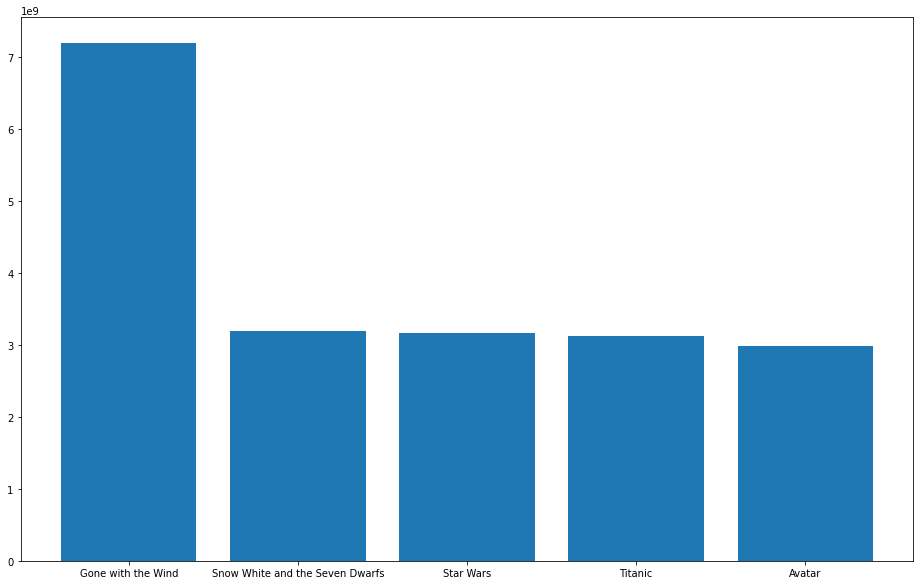

In [19]:
plt.figure(figsize=(16,10))
plt.bar(top_5_GM["original_title"], 
        top_5_GM["gross_margin"])
plt.plot() 

In [20]:
low_5_GM = movies.sort_values(by=["gross_margin"], ascending=True).head(5)

[]

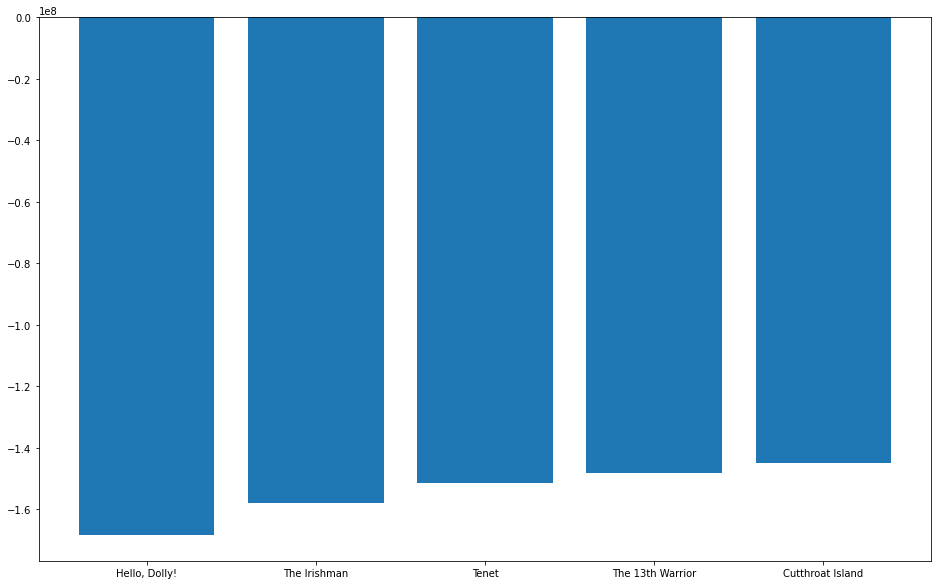

In [21]:
plt.figure(figsize=(16,10))
plt.bar(low_5_GM["original_title"], 
        low_5_GM["gross_margin"])
plt.plot() 

In [22]:
all_movie = pd.concat([top_5_GM, low_5_GM])
all_movie

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
29,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,283975,3977000.0,200852579.0,4.023526e+08,1949,3,Drama,History,Romance,7.184551e+07,7.268601e+09,Thomas Mitchell,Victor Fleming,"['Drama', 'History', 'Romance']",7.196755e+09
25,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,177157,1499000.0,184925486.0,1.849255e+08,1938,3,Animation,Family,Fantasy,2.613954e+07,3.224728e+09,Roy Atwell,William Cottrell,"['Animation', 'Family', 'Fantasy']",3.198589e+09
378,Star Wars,1977,"Action, Adventure, Fantasy",121,USA,English,George Lucas,Lucasfilm,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",8.6,1204107,11000000.0,460998507.0,7.757689e+08,1977,3,Action,Adventure,Fantasy,4.558048e+07,3.214538e+09,Mark Hamill,George Lucas,"['Action', 'Adventure', 'Fantasy']",3.168958e+09
2499,Titanic,1997,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",7.8,1023181,200000000.0,659363944.0,2.195170e+09,1998,2,Drama,Romance,NaN,3.129059e+08,3.434408e+09,Leonardo DiCaprio,James Cameron,"['Drama', 'Romance']",3.121502e+09
5414,Avatar,2009,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,Twentieth Century Fox,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000.0,760507625.0,2.790439e+09,2010,3,Action,Adventure,Fantasy,2.773990e+08,3.266098e+09,Sam Worthington,James Cameron,"['Action', 'Adventure', 'Fantasy']",2.988699e+09
227,"Hello, Dolly!",1969,"Adventure, Comedy, Musical",146,USA,English,Gene Kelly,Chenault Productions,"Barbra Streisand, Walter Matthau, Michael Craw...",7.1,13203,25000000.0,400881.0,4.008810e+05,1969,3,Adventure,Comedy,Musical,1.710538e+08,2.742889e+06,Barbra Streisand,Gene Kelly,"['Adventure', 'Comedy', 'Musical']",-1.683109e+08
6948,The Irishman,2019,"Biography, Crime, Drama",209,USA,"English, Italian, Latin, Spanish, German",Martin Scorsese,Tribeca Productions,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",7.9,304528,159000000.0,NaN,9.688530e+05,2019,3,Biography,Crime,Drama,1.590000e+08,9.688530e+05,Robert De Niro,Martin Scorsese,"['Biography', 'Crime', 'Drama']",-1.580311e+08
10443,Tenet,2020,"Action, Sci-Fi",150,"UK, USA","English, Russian, Ukrainian, Estonian",Christopher Nolan,Syncopy,"Elizabeth Debicki, Robert Pattinson, John Davi...",7.9,60922,205000000.0,NaN,5.360000e+07,2020,2,Action,Sci-Fi,NaN,2.050000e+08,5.360000e+07,Elizabeth Debicki,Christopher Nolan,"['Action', 'Sci-Fi']",-1.514000e+08
2549,The 13th Warrior,1999,"Action, Adventure, History",102,USA,"English, Latin, Swedish, Norse, Old, Danish, A...","John McTiernan, Michael Crichton",Touchstone Pictures,"Antonio Banderas, Diane Venora, Dennis Storhøi...",6.6,114625,160000000.0,32698899.0,6.169890e+07,1999,3,Action,Adventure,History,2.411592e+08,9.299535e+07,Antonio Banderas,John McTiernan,"['Action', 'Adventure', 'History']",-1.481638e+08
2026,Cutthroat Island,1995,"Action, Adventure, Comedy",124,"France, Italy, Germany, USA",English,Renny Harlin,Beckner/Gorman Productions,"Geena Davis, Matthew Modine, Frank Langella, M...",5.7,25564,98000000.0,10017322.0,1.001732e+07,1995,3,Action,Adventure,Comedy,1.614730e+08,1.650538e+07,Geena Davis,Renny Harlin,"['Action', 'Adventure', 'Comedy']",-1.449676e+08


[]

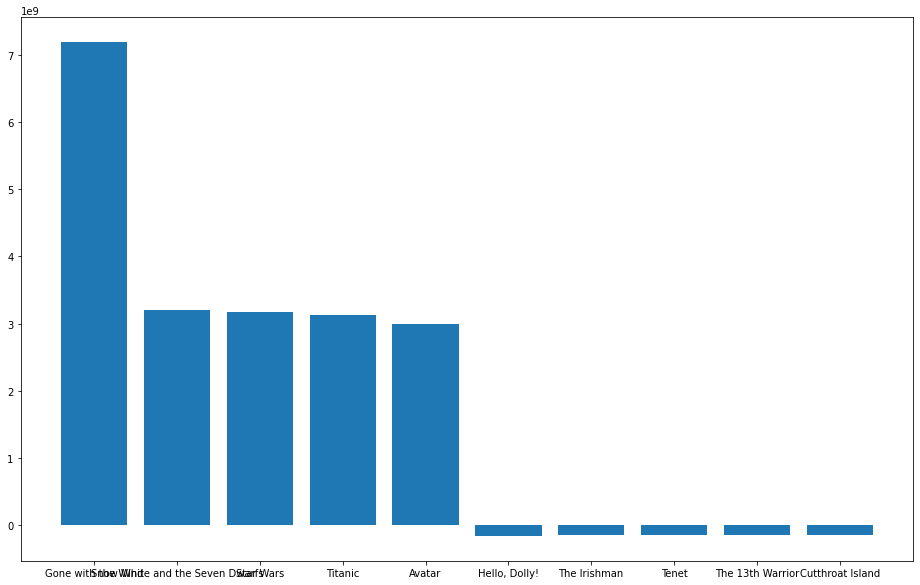

In [23]:
plt.figure(figsize=(16,10))
plt.bar(all_movie["original_title"], 
        all_movie["gross_margin"])
plt.plot() 

ROI stands for return on investment. Please create a new column that contains how much money the movie generated and analyse it

In [28]:
movies["ROI"] = (movies["gross_margin"] / movies["inflated_budget"])*100
movies

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin,ROI
0,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",8.1,55601,18000.0,8811.0,8811.0,1920,3,Fantasy,Horror,Mystery,2.259963e+05,1.106252e+05,Werner Krauss,Robert Wiene,"['Fantasy', 'Horror', 'Mystery']",-1.153711e+05,-51.050000
1,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Silent,Rex Ingram,Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000.0,9183673.0,9183673.0,1923,3,Drama,Romance,War,1.122266e+07,1.288315e+08,Pomeroy Cannon,Rex Ingram,"['Drama', 'Romance', 'War']",1.176089e+08,1047.959125
2,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",8.3,109038,250000.0,NaN,26916.0,1923,3,Comedy,Drama,Family,3.507081e+06,3.775864e+05,Carl Miller,Charles Chaplin,"['Comedy', 'Drama', 'Family']",-3.129495e+06,-89.233600
3,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000.0,NaN,11233.0,1927,2,Drama,Romance,NaN,5.154302e+06,1.649523e+05,Edna Purviance,Charles Chaplin,"['Drama', 'Romance']",-4.989349e+06,-96.799715
4,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",8.2,97480,923000.0,NaN,26916.0,1925,3,Adventure,Comedy,Drama,1.324410e+07,3.862169e+05,Charles Chaplin,Charles Chaplin,"['Adventure', 'Comedy', 'Drama']",-1.285788e+07,-97.083857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755,Dreissig,2019,Drama,115,Germany,German,Simona Kostova,Deutsche Film- und Fernsehakademie Berlin (DFFB),"Henner Borchers, Övünç Güvenisik, Pascal Houdu...",6.2,190,9000.0,NaN,30389.0,2020,1,Drama,NaN,NaN,9.000000e+03,3.038900e+04,Henner Borchers,Simona Kostova,['Drama'],2.138900e+04,237.655556
10756,I Still Believe,2020,"Biography, Drama, Music",116,USA,English,"Andrew Erwin, Jon Erwin",Kevin Downes Productions,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",6.5,6196,12000000.0,9868521.0,13681524.0,2020,3,Biography,Drama,Music,1.200000e+07,1.368152e+07,K.J. Apa,Andrew Erwin,"['Biography', 'Drama', 'Music']",1.681524e+06,14.012700
10757,Mestari Cheng,2019,"Comedy, Drama",114,"Finland, China","English, Finnish, Mandarin",Mika Kaurismäki,By Media,"Pak Hon Chu, Lucas Hsuan, Vesa-Matti Loiri, An...",6.8,251,2869000.0,NaN,435909.0,2019,2,Comedy,Drama,NaN,2.869000e+06,4.359090e+05,Pak Hon Chu,Mika Kaurismäki,"['Comedy', 'Drama']",-2.433091e+06,-84.806239
10758,Sang Krasue,2019,"Drama, Horror, Romance",122,Thailand,Thai,Sitisiri Mongkolsiri,Nakid,"Phantira Pipityakorn, Oabnithi Wiwattanawarang...",6.5,1206,1200000.0,NaN,171229.0,2019,3,Drama,Horror,Romance,1.200000e+06,1.712290e+05,Phantira Pipityakorn,Sitisiri Mongkolsiri,"['Drama', 'Horror', 'Romance']",-1.028771e+06,-85.730917


In [29]:
movies["ROI"].max()

1288938.6666666665

In [30]:
movies.query("ROI == 1288938.6666666665")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin,ROI
6594,Paranormal Activity,2007,"Horror, Mystery, Thriller",86,USA,English,Oren Peli,Solana Films,"Katie Featherston, Micah Sloat, Mark Fredrichs...",6.3,217252,15000.0,107918810.0,193355800.0,2010,3,Horror,Mystery,Thriller,18166.145788,2.341686e+08,Katie Featherston,Oren Peli,"['Horror', 'Mystery', 'Thriller']",2.341505e+08,1.288939e+06


In [31]:
movies["ROI"].min()

-99.99265865384615

In [32]:
movies.query("ROI == -99.99265865384615")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin,ROI
9792,Unless,2016,Drama,90,"Canada, Ireland",English,Alan Gilsenan,Media Pro One,"Hannah Gross, Catherine Keener, Matt Craven, A...",5.3,209,20800000.0,NaN,1527.0,2018,1,Drama,NaN,NaN,2.176197e+07,1597.62169,Hannah Gross,Alan Gilsenan,['Drama'],-2.176037e+07,-99.992659


In [33]:
movies.query("ROI == -99.99265865384615")["original_title"]

9792    Unless
Name: original_title, dtype: object

### What is the top 5 ROI movies of all times?

In [34]:
Top5 = movies.sort_values(by=["gross_margin"],ascending=False)
Top5.head(5)

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin,ROI
29,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",8.1,283975,3977000.0,200852579.0,4.023526e+08,1949,3,Drama,History,Romance,7.184551e+07,7.268601e+09,Thomas Mitchell,Victor Fleming,"['Drama', 'History', 'Romance']",7.196755e+09,10016.987151
25,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6,177157,1499000.0,184925486.0,1.849255e+08,1938,3,Animation,Family,Fantasy,2.613954e+07,3.224728e+09,Roy Atwell,William Cottrell,"['Animation', 'Family', 'Fantasy']",3.198589e+09,12236.590127
378,Star Wars,1977,"Action, Adventure, Fantasy",121,USA,English,George Lucas,Lucasfilm,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",8.6,1204107,11000000.0,460998507.0,7.757689e+08,1977,3,Action,Adventure,Fantasy,4.558048e+07,3.214538e+09,Mark Hamill,George Lucas,"['Action', 'Adventure', 'Fantasy']",3.168958e+09,6952.444655
2499,Titanic,1997,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",7.8,1023181,200000000.0,659363944.0,2.195170e+09,1998,2,Drama,Romance,NaN,3.129059e+08,3.434408e+09,Leonardo DiCaprio,James Cameron,"['Drama', 'Romance']",3.121502e+09,997.584935
5414,Avatar,2009,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,Twentieth Century Fox,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000.0,760507625.0,2.790439e+09,2010,3,Action,Adventure,Fantasy,2.773990e+08,3.266098e+09,Sam Worthington,James Cameron,"['Action', 'Adventure', 'Fantasy']",2.988699e+09,1077.400461


### What are the top 5 Industrial errors?

In [35]:
Top5.tail(5)

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin,ROI
2026,Cutthroat Island,1995,"Action, Adventure, Comedy",124,"France, Italy, Germany, USA",English,Renny Harlin,Beckner/Gorman Productions,"Geena Davis, Matthew Modine, Frank Langella, M...",5.7,25564,98000000.0,10017322.0,10017322.0,1995,3,Action,Adventure,Comedy,1.614730e+08,1.650538e+07,Geena Davis,Renny Harlin,"['Action', 'Adventure', 'Comedy']",-1.449676e+08,-89.778243
2549,The 13th Warrior,1999,"Action, Adventure, History",102,USA,"English, Latin, Swedish, Norse, Old, Danish, A...","John McTiernan, Michael Crichton",Touchstone Pictures,"Antonio Banderas, Diane Venora, Dennis Storhøi...",6.6,114625,160000000.0,32698899.0,61698899.0,1999,3,Action,Adventure,History,2.411592e+08,9.299535e+07,Antonio Banderas,John McTiernan,"['Action', 'Adventure', 'History']",-1.481638e+08,-61.438188
10443,Tenet,2020,"Action, Sci-Fi",150,"UK, USA","English, Russian, Ukrainian, Estonian",Christopher Nolan,Syncopy,"Elizabeth Debicki, Robert Pattinson, John Davi...",7.9,60922,205000000.0,NaN,53600000.0,2020,2,Action,Sci-Fi,NaN,2.050000e+08,5.360000e+07,Elizabeth Debicki,Christopher Nolan,"['Action', 'Sci-Fi']",-1.514000e+08,-73.853659
6948,The Irishman,2019,"Biography, Crime, Drama",209,USA,"English, Italian, Latin, Spanish, German",Martin Scorsese,Tribeca Productions,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",7.9,304528,159000000.0,NaN,968853.0,2019,3,Biography,Crime,Drama,1.590000e+08,9.688530e+05,Robert De Niro,Martin Scorsese,"['Biography', 'Crime', 'Drama']",-1.580311e+08,-99.390658
227,"Hello, Dolly!",1969,"Adventure, Comedy, Musical",146,USA,English,Gene Kelly,Chenault Productions,"Barbra Streisand, Walter Matthau, Michael Craw...",7.1,13203,25000000.0,400881.0,400881.0,1969,3,Adventure,Comedy,Musical,1.710538e+08,2.742889e+06,Barbra Streisand,Gene Kelly,"['Adventure', 'Comedy', 'Musical']",-1.683109e+08,-98.396476


## 4.Most profitable director, actors and companies

### Who are the most profitable director of all times?

In [36]:
movies.dtypes

original_title                 object
year                            int64
genre                          object
duration                        int64
country                        object
language                       object
director                       object
production_company             object
actors                         object
avg_vote                      float64
votes                           int64
budget                        float64
usa_gross_income              float64
worlwide_gross_income         float64
year_published                  int64
number_genres                   int64
genre_0                        object
genre_1                        object
genre_2                        object
inflated_budget               float64
inflated_worldwide_income     float64
main_actor                     object
main_director                category
genre_list                     object
gross_margin                  float64
ROI                           float64
dtype: objec

In [37]:
movies["main_director"] = movies["main_director"].astype('category')

In [38]:
movies["main_actor"] = movies["main_actor"].astype('category')

In [39]:
movies["production_company"] = movies["production_company"].astype('category')

In [40]:
movies.dtypes

original_title                 object
year                            int64
genre                          object
duration                        int64
country                        object
language                       object
director                       object
production_company           category
actors                         object
avg_vote                      float64
votes                           int64
budget                        float64
usa_gross_income              float64
worlwide_gross_income         float64
year_published                  int64
number_genres                   int64
genre_0                        object
genre_1                        object
genre_2                        object
inflated_budget               float64
inflated_worldwide_income     float64
main_actor                   category
main_director                category
genre_list                     object
gross_margin                  float64
ROI                           float64
dtype: objec

In [40]:
pro_d = movies.groupby(["main_director"])["gross_margin"].sum()

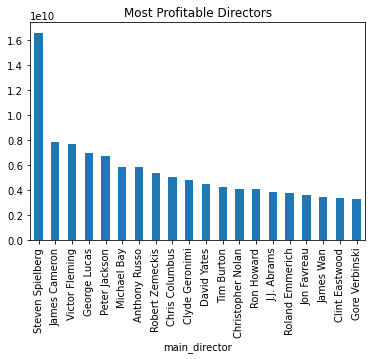

In [42]:
(pro_d
 .sort_values(ascending=False)
 .head(20)
 .plot(kind="bar", title='Most Profitable Directors'))

In [25]:
movies.query("main_director == 'Steven Spielberg'")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
318,The Sugarland Express,1974,"Crime, Drama",110,USA,English,Steven Spielberg,Universal Pictures,"Goldie Hawn, Ben Johnson, Michael Sacks, Willi...",6.8,15027,3000000.0,7500000.0,7.504841e+06,1974,2,Crime,Drama,NaN,1.528034e+07,3.822552e+07,Goldie Hawn,Steven Spielberg,"['Crime', 'Drama']",2.294517e+07
331,Jaws,1975,"Adventure, Thriller",124,USA,English,Steven Spielberg,Zanuck/Brown Productions,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",8.0,535807,7000000.0,260758300.0,4.719614e+08,1975,2,Adventure,Thriller,NaN,3.267191e+07,2.202840e+09,Roy Scheider,Steven Spielberg,"['Adventure', 'Thriller']",2.170168e+09
361,Close Encounters of the Third Kind,1977,"Drama, Sci-Fi",138,USA,"English, French, Spanish, Hindi",Steven Spielberg,Julia Phillips and Michael Phillips Productions,"Richard Dreyfuss, François Truffaut, Teri Garr...",7.6,180386,20000000.0,135189114.0,3.068995e+08,1978,2,Drama,Sci-Fi,NaN,8.287360e+07,1.271693e+09,Richard Dreyfuss,Steven Spielberg,"['Drama', 'Sci-Fi']",1.188820e+09
413,1941,1979,"Action, Comedy, War",118,USA,"English, Japanese, German, Spanish",Steven Spielberg,Universal Pictures,"Dan Aykroyd, Ned Beatty, John Belushi, Lorrain...",5.8,30826,35000000.0,31755742.0,9.245574e+07,1980,3,Action,Comedy,War,1.210571e+08,3.197835e+08,Dan Aykroyd,Steven Spielberg,"['Action', 'Comedy', 'War']",1.987264e+08
557,Raiders of the Lost Ark,1981,"Action, Adventure",115,USA,"English, German, Hebrew, Spanish, Arabic, Nepali",Steven Spielberg,Paramount Pictures,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",8.4,865510,18000000.0,248159971.0,3.901332e+08,1981,2,Action,Adventure,NaN,4.972416e+07,1.077725e+09,Harrison Ford,Steven Spielberg,"['Action', 'Adventure']",1.028001e+09
590,E.T. the Extra-Terrestrial,1982,"Family, Sci-Fi",115,USA,English,Steven Spielberg,Universal Pictures,"Dee Wallace, Henry Thomas, Peter Coyote, Rober...",7.8,362758,10500000.0,435110554.0,7.934822e+08,1982,2,Family,Sci-Fi,NaN,2.732252e+07,2.064756e+09,Dee Wallace,Steven Spielberg,"['Family', 'Sci-Fi']",2.037433e+09
760,Indiana Jones and the Temple of Doom,1984,"Action, Adventure",118,USA,"English, Sinhalese, Hindi",Steven Spielberg,Paramount Pictures,"Harrison Ford, Kate Capshaw, Ke Huy Quan, Amri...",7.6,438049,28000000.0,179870271.0,3.331073e+08,1984,2,Action,Adventure,NaN,6.767080e+07,8.050584e+08,Harrison Ford,Steven Spielberg,"['Action', 'Adventure']",7.373876e+08
825,The Color Purple,1985,Drama,154,USA,English,Steven Spielberg,Amblin Entertainment,"Danny Glover, Whoopi Goldberg, Margaret Avery,...",7.8,76504,15000000.0,98467863.0,9.846786e+07,1986,1,Drama,NaN,NaN,3.500562e+07,2.297953e+08,Danny Glover,Steven Spielberg,['Drama'],1.947896e+08
1024,Empire of the Sun,1987,"Action, Drama, History",153,USA,"English, Japanese, Mandarin, Shanghainese",Steven Spielberg,Amblin Entertainment,"Christian Bale, John Malkovich, Miranda Richar...",7.7,113212,35000000.0,22238696.0,2.223870e+07,1988,3,Action,Drama,History,7.736571e+07,4.915750e+07,Christian Bale,Steven Spielberg,"['Action', 'Drama', 'History']",-2.820821e+07
1238,Always,1989,"Drama, Fantasy, Romance",122,USA,English,Steven Spielberg,Universal Pictures,"Richard Dreyfuss, Holly Hunter, Brad Johnson, ...",6.4,27445,31000000.0,43858790.0,7.413479e+07,1989,3,Drama,Fantasy,Romance,6.277675e+07,1.501271e+08,Richard Dreyfuss,Steven Spielberg,"['Drama', 'Fantasy', 'Romance']",8.735038e+07


In [26]:
movies.query("main_director == 'Steven Spielberg'").sort_values(by=["gross_margin", "original_title"],ascending=False)

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
331,Jaws,1975,"Adventure, Thriller",124,USA,English,Steven Spielberg,Zanuck/Brown Productions,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",8.0,535807,7000000.0,260758300.0,4.719614e+08,1975,2,Adventure,Thriller,NaN,3.267191e+07,2.202840e+09,Roy Scheider,Steven Spielberg,"['Adventure', 'Thriller']",2.170168e+09
590,E.T. the Extra-Terrestrial,1982,"Family, Sci-Fi",115,USA,English,Steven Spielberg,Universal Pictures,"Dee Wallace, Henry Thomas, Peter Coyote, Rober...",7.8,362758,10500000.0,435110554.0,7.934822e+08,1982,2,Family,Sci-Fi,NaN,2.732252e+07,2.064756e+09,Dee Wallace,Steven Spielberg,"['Family', 'Sci-Fi']",2.037433e+09
1778,Jurassic Park,1993,"Action, Adventure, Sci-Fi",127,USA,"English, Spanish",Steven Spielberg,Universal Pictures,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",8.1,846021,63000000.0,404214720.0,1.033759e+09,1993,3,Action,Adventure,Sci-Fi,1.094792e+08,1.796430e+09,Sam Neill,Steven Spielberg,"['Action', 'Adventure', 'Sci-Fi']",1.686950e+09
361,Close Encounters of the Third Kind,1977,"Drama, Sci-Fi",138,USA,"English, French, Spanish, Hindi",Steven Spielberg,Julia Phillips and Michael Phillips Productions,"Richard Dreyfuss, François Truffaut, Teri Garr...",7.6,180386,20000000.0,135189114.0,3.068995e+08,1978,2,Drama,Sci-Fi,NaN,8.287360e+07,1.271693e+09,Richard Dreyfuss,Steven Spielberg,"['Drama', 'Sci-Fi']",1.188820e+09
557,Raiders of the Lost Ark,1981,"Action, Adventure",115,USA,"English, German, Hebrew, Spanish, Arabic, Nepali",Steven Spielberg,Paramount Pictures,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",8.4,865510,18000000.0,248159971.0,3.901332e+08,1981,2,Action,Adventure,NaN,4.972416e+07,1.077725e+09,Harrison Ford,Steven Spielberg,"['Action', 'Adventure']",1.028001e+09
1290,Indiana Jones and the Last Crusade,1989,"Action, Adventure",127,USA,"English, German, Greek, Arabic",Steven Spielberg,Paramount Pictures,"Harrison Ford, Sean Connery, Denholm Elliott, ...",8.2,676976,48000000.0,197171806.0,4.743109e+08,1989,2,Action,Adventure,NaN,9.720271e+07,9.605063e+08,Harrison Ford,Steven Spielberg,"['Action', 'Adventure']",8.633036e+08
2429,The Lost World: Jurassic Park,1997,"Action, Adventure, Sci-Fi",129,USA,"English, Spanish",Steven Spielberg,Universal Pictures,"Jeff Goldblum, Julianne Moore, Pete Postlethwa...",6.6,371000,73000000.0,229086679.0,6.186390e+08,1997,3,Action,Adventure,Sci-Fi,1.142107e+08,9.678790e+08,Jeff Goldblum,Steven Spielberg,"['Action', 'Adventure', 'Sci-Fi']",8.536684e+08
760,Indiana Jones and the Temple of Doom,1984,"Action, Adventure",118,USA,"English, Sinhalese, Hindi",Steven Spielberg,Paramount Pictures,"Harrison Ford, Kate Capshaw, Ke Huy Quan, Amri...",7.6,438049,28000000.0,179870271.0,3.331073e+08,1984,2,Action,Adventure,NaN,6.767080e+07,8.050584e+08,Harrison Ford,Steven Spielberg,"['Action', 'Adventure']",7.373876e+08
4190,Indiana Jones and the Kingdom of the Crystal S...,2008,"Action, Adventure",122,USA,"English, German, Russian",Steven Spielberg,Paramount Pictures,"Harrison Ford, Cate Blanchett, Karen Allen, Sh...",6.1,417120,185000000.0,317101119.0,7.906539e+08,2008,2,Action,Adventure,NaN,2.157647e+08,9.221364e+08,Harrison Ford,Steven Spielberg,"['Action', 'Adventure']",7.063717e+08
2605,Saving Private Ryan,1998,"Drama, War",169,USA,"English, French, German, Czech",Steven Spielberg,DreamWorks,"Tom Hanks, Tom Sizemore, Edward Burns, Barry P...",8.6,1203825,70000000.0,217049603.0,4.823496e+08,1998,2,Drama,War,NaN,1.078374e+08,7.430758e+08,Tom Hanks,Steven Spielberg,"['Drama', 'War']",6.352385e+08


### Who are the most profitable actors of all times?

In [43]:
pro_actor = movies.groupby(["main_actor"])["gross_margin"].sum()
pro_actor.sort_values(ascending=False)

main_actor
Robert Downey Jr.    1.007790e+10
Tom Hanks            9.848174e+09
Tom Cruise           9.170686e+09
Harrison Ford        7.600682e+09
Thomas Mitchell      7.196755e+09
                         ...     
Seth Green          -1.294077e+08
Elizabeth Debicki   -1.514000e+08
Jeremy Irons        -1.555932e+08
Ray Liotta          -1.613170e+08
Andy Garcia         -1.747407e+08
Name: gross_margin, Length: 5379, dtype: float64

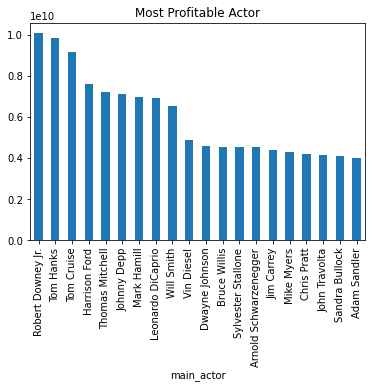

In [47]:
(pro_actor
 .sort_values(ascending=False)
 .head(20)
 .plot(kind="bar", title='Most Profitable Actor'))

### Who are the most profitable producing companies of all times?

In [45]:
pro_com = movies.groupby(["production_company"])["gross_margin"].sum()
pro_com.sort_values(ascending=False)

production_company
Warner Bros.                            4.900459e+10
Universal Pictures                      4.889229e+10
Paramount Pictures                      4.394270e+10
Twentieth Century Fox                   3.818388e+10
Columbia Pictures                       3.487805e+10
                                            ...     
Emmett/Furla/Oasis Films (EFO Films)   -1.584648e+08
Chenault Productions                   -1.683109e+08
Tribeca Productions                    -2.032383e+08
Franchise Pictures                     -2.766140e+08
Gaumont                                -2.827009e+08
Name: gross_margin, Length: 4610, dtype: float64

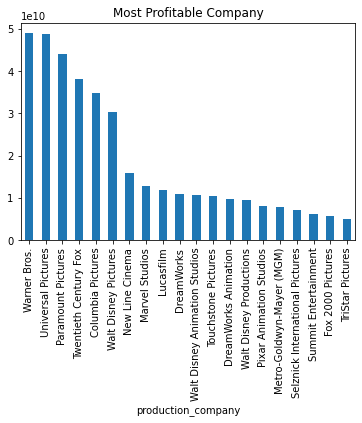

In [46]:
(pro_com
 .sort_values(ascending=False)
 .head(20)
 .plot(kind="bar", title='Most Profitable Company'))

## 5.Directors and companies you should probably never call...

### Who are the least profitable director of all times?

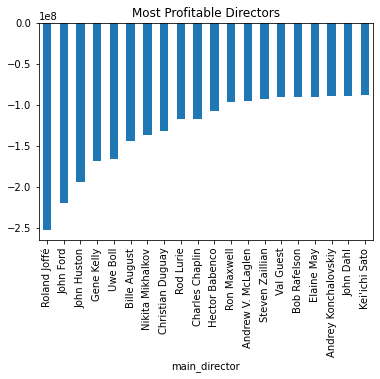

In [50]:
(pro_d
 .sort_values(ascending=True)
 .head(20)
 .plot(kind="bar", title='Most Profitable Directors'))

In [ ]:
# Roland Joffé

### Who are the least profitable actors of all times?

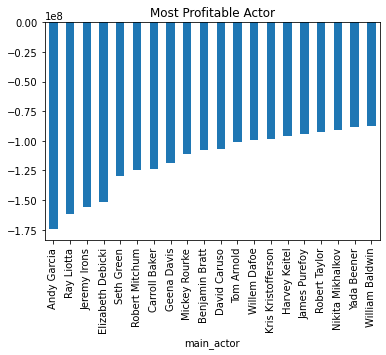

In [49]:
(pro_actor
 .sort_values(ascending=True)
 .head(20)
 .plot(kind="bar", title='Most Profitable Actor'))

In [ ]:
# Andy Garcia

### Who are the least profitable producing companies of all times?

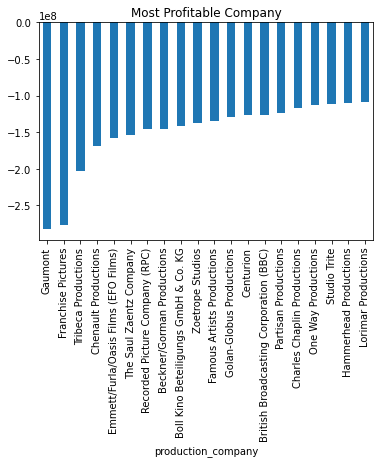

In [48]:
(pro_com
 .sort_values(ascending=True)
 .head(20)
 .plot(kind="bar", title='Most Profitable Company'))

In [ ]:
# Gaumont                                

## 6. Is there a correlation between budget and ratings?

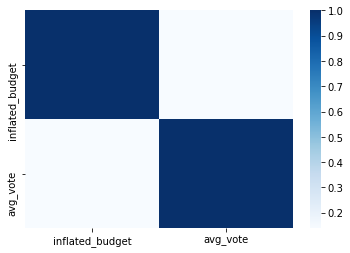

In [45]:
sns.heatmap(movies[["inflated_budget", "avg_vote"]].corr(),
            cmap="Blues")

## 7. Who are the most liked directors and actors?

In [46]:
movies.columns

Index(['original_title', 'year', 'genre', 'duration', 'country', 'language',
       'director', 'production_company', 'actors', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'year_published',
       'number_genres', 'genre_0', 'genre_1', 'genre_2', 'inflated_budget',
       'inflated_worldwide_income', 'main_actor', 'main_director',
       'genre_list', 'gross_margin', 'ROI'],
      dtype='object')

In [47]:
liked_directors = movies.groupby(["main_director"])["avg_vote"].mean()
liked_directors.sort_values(ascending=False)

main_director
Derek Ahonen          9.2
Tareque Masud         8.6
Amr Gamal             8.6
Lorenzo Thione        8.6
Swaroop Rsj           8.5
                     ... 
Antoni Krauze         1.4
Hüdaverdi Yavuz       1.4
Darren Doane          1.4
Michael David Pate    1.3
Maksim Voronkov       1.1
Name: avg_vote, Length: 5399, dtype: float64

In [48]:
liked_actors = movies.groupby(["main_actor"])["avg_vote"].mean()
liked_actors.sort_values(ascending=False)

main_actor
Rob Franco            9.2
Noel Appleby          8.9
Alan Howard           8.8
Eli Wallach           8.8
Nurul Islam Bablu     8.6
                     ... 
Marina Golub          1.5
Beata Fido            1.4
Orhan Aydin           1.4
Joyce Ilg             1.3
Mikhail Bogdasarov    1.1
Name: avg_vote, Length: 5379, dtype: float64

## 8. "Coin flips"

### Who are the directors that can either generate pretty good movies or a rubbish one?

In [51]:
coin_directors = movies.groupby(["main_director"])["avg_vote"].std()
coin_directors.sort_values(ascending=False)

main_director
Josef Rusnak            2.545584
Charles S. Dutton       2.474874
Jorge Ramírez Suárez    2.474874
Aleksey Andrianov       2.404163
Ali Yorgancioglu        2.262742
                          ...   
Étienne Chatiliez            NaN
Óskar Jónasson               NaN
Özgür Yildirim               NaN
Özhan Eren                   NaN
Ümit Ünal                    NaN
Name: avg_vote, Length: 5399, dtype: float64

In [52]:
movies.query("main_director == 'Josef Rusnak'")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
2743,The Thirteenth Floor,1999,"Mystery, Sci-Fi, Thriller",100,"USA, Germany",English,Josef Rusnak,Columbia Pictures,"Craig Bierko, Armin Mueller-Stahl, Gretchen Mo...",7.1,65720,16000000.0,11916661.0,18564088.0,1999,3,Mystery,Sci-Fi,Thriller,2.411592e+07,2.798063e+07,Craig Bierko,Josef Rusnak,"['Mystery', 'Sci-Fi', 'Thriller']",3.864709e+06
6561,It's Alive,2009,"Horror, Sci-Fi",80,USA,English,Josef Rusnak,Millennium Films,"Bijou Phillips, James Murray, Raphaël Coleman,...",3.5,2680,10000000.0,NaN,1035267.0,2009,2,Horror,Sci-Fi,NaN,1.170460e+07,1.211739e+06,Bijou Phillips,Josef Rusnak,"['Horror', 'Sci-Fi']",-1.049286e+07


### Who are the actors that can either generate pretty good movies or a rubbish one?

In [51]:
coin_actors = movies.groupby(["main_actor"])["avg_vote"].std()
coin_actors.sort_values(ascending=False)

main_actor
Kal Penn                 3.606245
Ajay Devgn               3.036994
Gérard Jugnot            2.969848
Laurence Olivier         2.948446
Sally Kirkland           2.828427
                           ...   
Émilie Dequenne               NaN
Özge Özberk                   NaN
Ümit Bülent Dinçer            NaN
Þorsteinn Guðmundsson         NaN
Þórhallur Sverrisson          NaN
Name: avg_vote, Length: 5379, dtype: float64

In [55]:
movies.query("main_actor == 'Kal Penn'")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
4831,The Namesake,2006,Drama,122,"USA, India","English, Hindi, Bengali, French",Mira Nair,Fox Searchlight Pictures,"Kal Penn, Tabu, Irrfan Khan, Jacinda Barrett, ...",7.5,19079,9500000.0,13569248.0,20354321.0,2007,1,Drama,NaN,NaN,1.183292e+07,2.535274e+07,Kal Penn,Mira Nair,['Drama'],1.351982e+07
5554,Epic Movie,2007,"Adventure, Comedy",86,USA,English,"Jason Friedberg, Aaron Seltzer",Regency Enterprises,"Kal Penn, Adam Campbell, Jennifer Coolidge, Ja...",2.4,100874,20000000.0,39739367.0,87238158.0,2007,2,Adventure,Comedy,NaN,2.422153e+07,1.056521e+08,Kal Penn,Jason Friedberg,"['Adventure', 'Comedy']",8.143055e+07


In [56]:
movies.query("main_director == 'Bob Clark'")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin
505,Tribute,1980,"Comedy, Drama",121,Canada,English,Bob Clark,Tiberius Film Productions,"Jack Lemmon, Robby Benson, Lee Remick, Colleen...",6.3,612,8400000.0,9000000.0,9000000.0,1980,2,Comedy,Drama,NaN,2.559829e+07,2.742674e+07,Jack Lemmon,Bob Clark,"['Comedy', 'Drama']",1.828449e+06
618,Porky's,1981,Comedy,94,"Canada, USA",English,Bob Clark,Astral Bellevue Pathé,"Dan Monahan, Mark Herrier, Wyatt Knight, Roger...",6.2,37264,2500000.0,111289673.0,111289673.0,1982,1,Comedy,NaN,NaN,6.906133e+06,3.074325e+08,Dan Monahan,Bob Clark,['Comedy'],3.005264e+08
648,A Christmas Story,1983,"Comedy, Family",94,"USA, Canada",English,Bob Clark,Metro-Goldwyn-Mayer (MGM),"Melinda Dillon, Darren McGavin, Scott Schwartz...",7.9,127692,3300000.0,20605209.0,20618717.0,1983,2,Comedy,Family,NaN,8.319810e+06,5.198297e+07,Melinda Dillon,Bob Clark,"['Comedy', 'Family']",4.366316e+07
683,Porky's II: The Next Day,1983,Comedy,98,"Canada, USA",English,Bob Clark,Astral Bellevue Pathé,"Dan Monahan, Wyatt Knight, Mark Herrier, Roger...",5.1,10675,6500000.0,33759266.0,33759266.0,1983,1,Comedy,NaN,NaN,1.638751e+07,8.511233e+07,Dan Monahan,Bob Clark,['Comedy'],6.872482e+07
789,Rhinestone,1984,"Comedy, Music",111,USA,English,Bob Clark,Twentieth Century Fox,"Sylvester Stallone, Dolly Parton, Richard Farn...",3.9,6731,28000000.0,21435321.0,21435321.0,1984,2,Comedy,Music,NaN,6.767080e+07,5.180519e+07,Sylvester Stallone,Bob Clark,"['Comedy', 'Music']",-1.586561e+07
1410,Loose Cannons,1990,"Action, Comedy, Crime",94,USA,English,Bob Clark,TriStar Pictures,"Dan Aykroyd, Gene Hackman, Dom DeLuise, Ronny ...",4.9,4373,15000000.0,5585154.0,5585154.0,1990,3,Action,Comedy,Crime,2.881871e+07,1.073046e+07,Dan Aykroyd,Bob Clark,"['Action', 'Comedy', 'Crime']",-1.808825e+07
1917,It Runs in the Family,1994,"Comedy, Family",85,USA,English,Bob Clark,Metro-Goldwyn-Mayer (MGM),"Charles Grodin, Kieran Culkin, Mary Steenburge...",5.6,1413,15000000.0,70936.0,70936.0,1994,2,Comedy,Family,NaN,2.541569e+07,1.201925e+05,Charles Grodin,Bob Clark,"['Comedy', 'Family']",-2.529550e+07
2328,Baby Geniuses,1999,"Comedy, Crime, Family",97,USA,English,Bob Clark,Crystal Sky Worldwide,"Kathleen Turner, Christopher Lloyd, Kim Cattra...",2.6,24780,12000000.0,27250736.0,36450736.0,2000,3,Comedy,Crime,Family,1.808694e+07,5.494019e+07,Kathleen Turner,Bob Clark,"['Comedy', 'Crime', 'Family']",3.685325e+07
3428,Superbabies: Baby Geniuses 2,2004,"Comedy, Family, Sci-Fi",88,"Germany, UK, USA",English,Bob Clark,ApolloMedia Distribution,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.9,29546,20000000.0,9219388.0,9448644.0,2004,3,Comedy,Family,Sci-Fi,2.658624e+07,1.256019e+07,Jon Voight,Bob Clark,"['Comedy', 'Family', 'Sci-Fi']",-1.402604e+07


## 9.Which directors worked on giant productions and small movies?

In [54]:
Giant_small = movies.groupby(["main_director"])["inflated_budget"].std()
Giant_small.sort_values(ascending=False)

main_director
Anthony Russo           1.373704e+08
Joseph L. Mankiewicz    1.372250e+08
Rian Johnson            1.352294e+08
Marc Webb               1.302513e+08
Taika Waititi           1.204885e+08
                            ...     
Étienne Chatiliez                NaN
Óskar Jónasson                   NaN
Özgür Yildirim                   NaN
Özhan Eren                       NaN
Ümit Ünal                        NaN
Name: inflated_budget, Length: 5399, dtype: float64

In [55]:
movies.query("main_director == 'Anthony Russo'")

,original_title,year,genre,duration,country,language,director,production_company,actors,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,year_published,number_genres,genre_0,genre_1,genre_2,inflated_budget,inflated_worldwide_income,main_actor,main_director,genre_list,gross_margin,ROI
3433,Welcome to Collinwood,2002,"Comedy, Crime",86,"USA, Germany",English,"Anthony Russo, Joe Russo",Gaylord Films,"William H. Macy, Isaiah Washington, Sam Rockwe...",6.4,14058,12000000.0,336620.0,4.172703e+06,2003,2,Comedy,Crime,NaN,1.674977e+07,5.824319e+06,William H. Macy,Anthony Russo,"['Comedy', 'Crime']",-1.092545e+07,-65.227475
5110,"You, Me and Dupree",2006,"Comedy, Romance",110,USA,English,"Anthony Russo, Joe Russo",Universal Pictures,"Owen Wilson, Kate Hudson, Matt Dillon, Michael...",5.6,77597,54000000.0,75628110.0,1.306289e+08,2006,2,Comedy,Romance,NaN,6.726080e+07,1.627075e+08,Owen Wilson,Anthony Russo,"['Comedy', 'Romance']",9.544670e+07,141.905376
8076,Captain America: The Winter Soldier,2014,"Action, Adventure, Sci-Fi",136,USA,"English, French","Anthony Russo, Joe Russo",Marvel Entertainment,"Chris Evans, Samuel L. Jackson, Scarlett Johan...",7.7,719085,170000000.0,259766572.0,7.144215e+08,2014,3,Action,Adventure,Sci-Fi,1.803198e+08,7.577903e+08,Chris Evans,Anthony Russo,"['Action', 'Adventure', 'Sci-Fi']",5.774705e+08,320.247943
9355,Captain America: Civil War,2016,"Action, Adventure, Sci-Fi",147,USA,"English, German, Xhosa, Russian, Romanian, Hindi","Anthony Russo, Joe Russo",Marvel Studios,"Chris Evans, Robert Downey Jr., Scarlett Johan...",7.8,644241,250000000.0,408084349.0,1.153332e+09,2016,3,Action,Adventure,Sci-Fi,2.615622e+08,1.206672e+09,Chris Evans,Anthony Russo,"['Action', 'Adventure', 'Sci-Fi']",9.451100e+08,361.332848
9653,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",Marvel Studios,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000.0,678815482.0,2.048360e+09,2018,3,Action,Adventure,Sci-Fi,3.210000e+08,2.048360e+09,Robert Downey Jr.,Anthony Russo,"['Action', 'Adventure', 'Sci-Fi']",1.727360e+09,538.118303
9654,Avengers: Endgame,2019,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",Marvel Studios,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.4,754786,356000000.0,858373000.0,2.797801e+09,2019,3,Action,Adventure,Drama,3.560000e+08,2.797801e+09,Robert Downey Jr.,Anthony Russo,"['Action', 'Adventure', 'Drama']",2.441801e+09,685.899035


In [58]:
budget_flipcoin= movies.groupby(["director"])["inflated_budget"].agg(np.ptp).sort_values(ascending=False)
budget_flipcoin.head(1)

director
Joseph L. Mankiewicz    3.464818e+08
Name: inflated_budget, dtype: float64